In [237]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

En este Notebook se encontrará la implementación del cerebro encontrado gracias al Notebook Titulado Proyecto final.

In [238]:
sigm = lambda x: 1/(1+np.exp(-x))
dt=0.1
t=np.arange(0.,10.,dt)

In [239]:
class Layer0:
    
    
    def __init__(self,ActFun,rate=0.2): # Jugar con la tasa de mutacion
        
        
        self.ActFunc = ActFun
        self.rate = rate
        
        
        self.W = (np.array([[-0.61173487, -8.28102699,  1.68677922, -1.85423731,  3.93500793]]))
        self.b = (np.array([[11.26055141, -4.00534832, -7.01962389, -0.67937954, -4.34161722]]))
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc( z )[0]
    
    def Mutate(self):
    
        #self.W += np.random.normal( loc=0., scale=self.rate, size=(self.NC,self.NN))
        #self.b += np.random.normal( loc=0., scale=self.rate, size=(1,self.NN))
        
        self.W += 0
        self.b += 0

In [240]:
class Layer1:
    
    
    def __init__(self,ActFun,rate=0.2): # Jugar con la tasa de mutacion
        
        
        self.ActFunc = ActFun
        self.rate = rate
        
        
        self.W = np.array([[ 3.79010153, -5.0532161,  -5.1032786,  -5.72798425,  7.00933406],
 [ 1.63195524,  5.057896,    0.54500588,  6.46227629, -2.55617038],
 [-0.7467237,  -5.30973156, -2.75435803,  6.62042926, -4.36456166],
 [-5.52955681,  1.09919668, -3.50150731, -6.17652007, -5.00111519],
 [ 2.68441386, -5.09060617, -2.09360221, 10.47683124, -9.18762537]])
        self.b = np.array([[ 0.44585056, -1.39789919,  8.32865219, -9.56991546,  5.04777824]])
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc( z )[0]
    
    def Mutate(self):
    
        #self.W += np.random.normal( loc=0., scale=self.rate, size=(self.NC,self.NN))
        #self.b += np.random.normal( loc=0., scale=self.rate, size=(1,self.NN))
        
        self.W += 0
        self.b += 0

In [241]:
class Layer2:
    
    
    def __init__(self,ActFun,rate=0.2): # Jugar con la tasa de mutacion
        
        
        self.ActFunc = ActFun
        self.rate = rate
        
        
        self.W = np.array([[ 7.97707169],
 [ 8.55158666],
 [-4.74651607],
 [-5.65506353],
 [-8.53769117]])

        self.b =np.array([[6.00207908]]) 
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc( z )[0]
    
    def Mutate(self):
    
        #self.W += np.random.normal( loc=0., scale=self.rate, size=(self.NC,self.NN))
        #self.b += np.random.normal( loc=0., scale=self.rate, size=(1,self.NN))
        
        self.W += 0
        self.b += 0

In [242]:
l0=Layer0(sigm)
l1=Layer1(sigm)
l2=Layer2(sigm)

Creamos primero 3 capas "fijas" con los valores encontrados, estos valores los podemos encontrar acá abajo y son copiados de los calores Weights del archivo Proyecto final. Repetimos el proceso con los Biasses

In [243]:
Weights= (np.array([[-0.61173487, -8.28102699,  1.68677922, -1.85423731,  3.93500793]]))
Weights1= np.array([[ 3.79010153, -5.0532161,  -5.1032786,  -5.72798425,  7.00933406],
 [ 1.63195524,  5.057896,    0.54500588,  6.46227629, -2.55617038],
 [-0.7467237,  -5.30973156, -2.75435803,  6.62042926, -4.36456166],
 [-5.52955681,  1.09919668, -3.50150731, -6.17652007, -5.00111519],
 [ 2.68441386, -5.09060617, -2.09360221, 10.47683124, -9.18762537]])
Weights2= np.array([[ 7.97707169],
 [ 8.55158666],
 [-4.74651607],
 [-5.65506353],
 [-8.53769117]])


In [244]:
Biasses, Biasses1, Biasses2=(np.array([[11.26055141, -4.00534832, -7.01962389, -0.67937954, -4.34161722]]),
 np.array([[ 0.44585056, -1.39789919,  8.32865219, -9.56991546,  5.04777824]]),
 np.array([[6.00207908]]))


In [245]:
Best_Brain=[l0,l1,l2]

In [246]:
class Robot:
    
    def __init__(self, dt, Layers, Id=0):
        
        self.Id = Id
        self.dt = dt
        
        
        self.r = np.random.uniform([0.,0.])
        self.v = np.array([1.,0])

        
        # Capacidad o aptitud del individuo
        self.Fitness = np.inf
        self.Steps = 0

        # Brain
        self.Layers = Layers
        
    def GetR(self):
        return self.r
    
    def Evolution(self):
        self.r += self.v*self.dt # Euler integration (Metodos 2)

        # Cada generación regreamos el robot al origin
        # Y volvemos a estimar su fitness
    def Reset(self):
        self.Steps = 0.
        self.r = np.array([0.,0.])
        self.Fitness = np.inf    
        
    # Aca debes definir que es mejorar en tu proceso evolutivo
    def SetFitness(self):
        self.Fitness = 1/self.Steps
        # Esto no hace nada por ahora
        
        
       # Brain stuff
    def BrainActivation(self,x,threshold=0.7): 
        # El umbral (threshold) cerebral es a tu gusto!
        # cercano a 1 es exigente
        # cercano a 0 es sindrome de down
        
        # Forward pass - la infomación fluye por el modelo hacia adelante
        for i in range(len(self.Layers)):         
            if i == 0:
                output = self.Layers[i].Activation(x)
            else:
                output = self.Layers[i].Activation(output)
        
        self.Activation = np.round(output,4)
    
        # Cambiamos el vector velocidad
        if self.Activation[0] > threshold:
            self.v = -self.v
            self.Steps-=0.4
            
            # Deberias penalizar de alguna forma, dado que mucha activación es desgastante!
            # Para cualquier cerebro
    
        return self.Activation
    
    # Aca mutamos (cambiar de parametros) para poder "aprender"
    def Mutate(self):
        for i in range(len(self.Layers)):
            self.Layers[i].Mutate()
    
    # Devolvemos la red neuronal ya entrenada
    def GetBrain(self):
        return self.Layers

In [247]:
Best_Robot=Robot(0.1,Best_Brain)
Best_Robots=[Best_Robot,Best_Robot,Best_Robot,Best_Robot,Best_Robot]

En esta parte generamos un "mejor robot" con el Mejor cerebro derivado de los pesos y los biasses encontrados.También Generamos una lista con 5 de estos robots para poder plotear todo.

In [248]:
def GetPlot():
    
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    
    ax.set_xlim(-1.,1.)
    ax.set_ylim(-1.,1.)
 
    return ax,ax1


In [249]:
def TimeEvolution(Robots,e,Plot=True):
    
  
    for it in range(t.shape[0]):
        
        if Plot:
        
            clear_output(wait=True)
        
            ax,ax1 = GetPlot()
            ax1.set_ylim(0.,1.)
        
            ax.set_title('t = {:.3f}'.format(t[it]))
        
        Activation = np.zeros(len(Robots))
        
        for i,p in enumerate(Robots):
            if -1<p.GetR()[0]<1:
                p.Steps+=0.4
            p.Evolution()
            #Acá va el self.steps if está entre -1 y 1 aumentar el paso
            
         
            # Activacion cerebral
            Act = p.BrainActivation(p.GetR()[0])
            Activation[i] = Act
            # Region donde aumentamos los pasos para el fitness
            
                
            if Plot and i < 5: # Solo pintamos los primeros 5, por tiempo de computo
                ax.scatter(p.r[0],p.r[1],label='Id: {}, Steps: {:.0f}'.format(p.Id,p.Steps))
                ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
                
        # Pintamos la activaciones de los primeros 5
        
        if Plot:
            ax1.plot(np.arange(0,len(Robots[:5]),1),Activation[:5],marker='o',color='b',label='Activation')
            ax1.axhline(y=0.7,color='r')
        
        if Plot:
        
            ax.legend(loc=0)  
            ax1.legend(loc=0)
            plt.show()
            time.sleep(0.001)

In [250]:
# Definimos la rutina de entrenamiento
def Genetic(Robots, epochs = 200, Plot = True, Plottime=False):
    
    # Porcentaje de robots elegidos en cada epoch
    N = int(0.7*len(Robots))
    
    FitVector = np.array([])
    
    
    x = np.linspace(-1,1,20)
    Act = np.zeros_like(x)
    
    for e in range(int(epochs)):
        
        # Reiniciamos y mutamos los pesos
        
        for p in Robots:
            p.Reset() 
            p.Mutate()
            
        # Evolucionamos
        TimeEvolution(Robots,e,Plottime) # Apagar dibujar la evolución para entrenar
        
        # Actualizamos fitness de cada robot
        Fitnesses=[]
        for i,p in enumerate(Robots):
            p.SetFitness()
            fitness_p = p.Fitness
            
            Fitnesses.append(fitness_p)

     
        Fitnesses_ordenada=sorted(Fitnesses,reverse=False)
            
        
        # Aca va toda la rutina de ordenar los bots del más apto al menos apto
        
        
        # Guardamos el mejor fitness y le mejor robot
        best_fitness = Fitnesses_ordenada[0]
        Mejor_indice= Fitnesses.index(best_fitness)

        best_bot = Robots[Mejor_indice] #Esto no es asi, deben ver como se elige al mejor
        
        FitVector = np.append(FitVector,best_fitness)
        
        for i in range(len(x)):
            Act[i] = best_bot.BrainActivation(x[i])
        
        clear_output(wait=True)
        
        print('Epoch:', e)
                
        # Last fitness
        print('Last Fitness:', FitVector[-1])
        
        
        if Plot:
            
            ax,ax1 = GetPlot()
            ax.plot(x,Act,color='k')
            ax.set_ylim(0.,1)
            ax.axhline(y=0.75,ls='--',color='r',label='Threshold')
            
            ax1.set_title('Fitness')
            ax1.plot(FitVector)
        
            ax.legend(loc=0)
            
            plt.show()
            
            time.sleep(0.01)
        
        
    
    return best_bot, FitVector

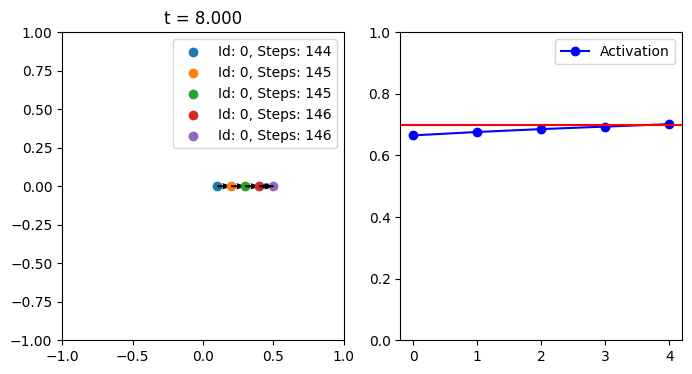

In [251]:
Best, FitVector = Genetic(Best_Robots,Plot=True,Plottime=True)

Como podemos ver al correr todo podemos ver 5 Robots entrenados que se mueven de lado a lado sin moverse de los límites estipulados.